# Heart Disease Early Detection ML Project | Gabriel Allen & Noah Laraway

According to the Centers for Disease Control and Preventions’ National Center for Health Statistics, heart disease and stroke are the first and fifth most common cause of death in the United States. The aim of this project is to help inform the public of common heart and brain health metrics to be aware of, by generating a user-friendly API that can be queried by both medical professionals and laymen alike. Due to the disparate nature of the data collected between each dataset, a Non-Relational (NoSQL) database has been selected to store the data for ease of use and portability. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi
%matplotlib inline

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("heart.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
#Quicklook at columns for attribute selection
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# Review features (columns)

> **Age**: Age of individual in years

> **Anaemia**: Decrease of red blood cells or hemoglobin (boolean)

> **Creatine Phosphokinase**: Level of the CPK enzyme in the blood (mcg/L)

> **Diabetes**: If the patient has diabetes (boolean)

> **Ejection Fraction**: Percentage of blood leaving the heart at each contraction (percentage)

> **High Blood Pressure**: If the patient has hypertension (boolean)

> **Platelets**: Platelets in the blood (kiloplatelets/mL)

> **Serum Creatinine**: Level of serum creatinine in the blood (mg/dL)

> **Serum Sodium**: Level of serum sodium in the blood (mEq/L)

> **Sex**: Woman or man (binary)

> **Smoking**: If the patient smokes or not (boolean)

> **Time**: Follow-up period (days) {Not Included in Analysis}

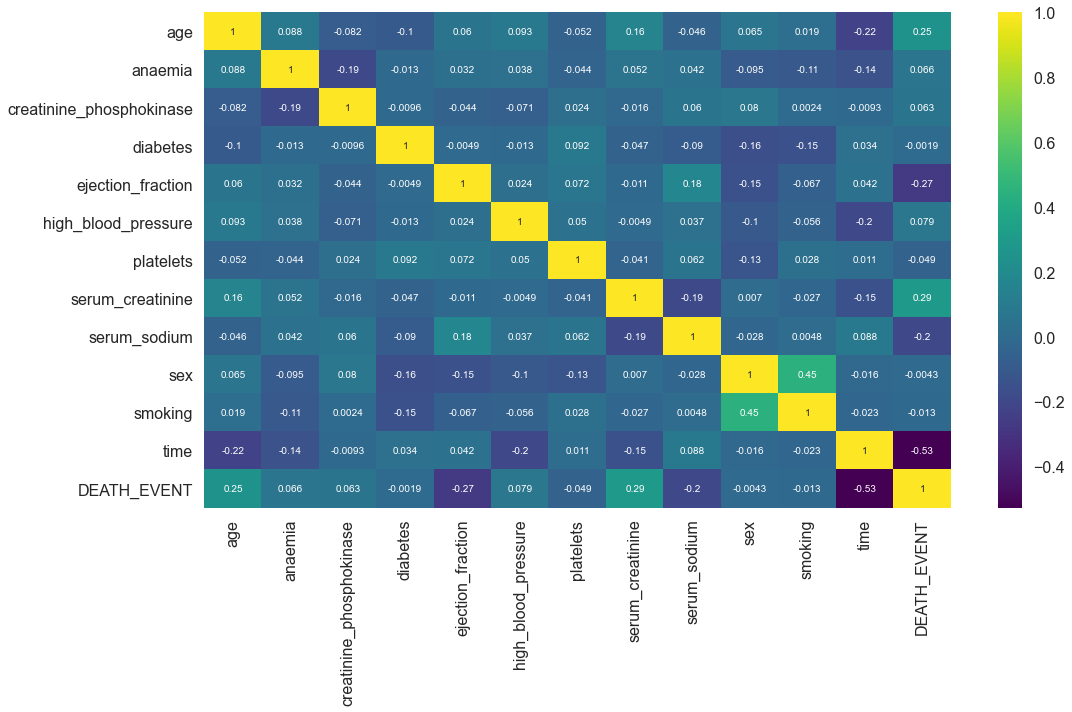

In [4]:
#Check Correlation of Dataset
plt.style.use('seaborn-white')
plt.style.use('seaborn-poster')
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='viridis')
plt.tight_layout()
plt.savefig('corr_map.png')
plt.show()

In [5]:
# Set initial features for model selection.
selected_features = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking']]
X = selected_features
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0


In [6]:
#Assign target variable to object
#Use `DEATH_EVENT` for the y values
y = df['DEATH_EVENT']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

# Create a Train Test Split

In [7]:
#Generate training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1
102,80.0,0,898,0,25,0,149000.0,1.1,144,1,1
38,60.0,0,2656,1,30,0,305000.0,2.3,137,1,0
95,58.0,1,133,0,60,1,219000.0,1.0,141,1,0
67,72.0,1,110,0,25,0,274000.0,1.0,140,1,1


In [9]:
#Check Number of Attributes
len(X_train.columns)

11

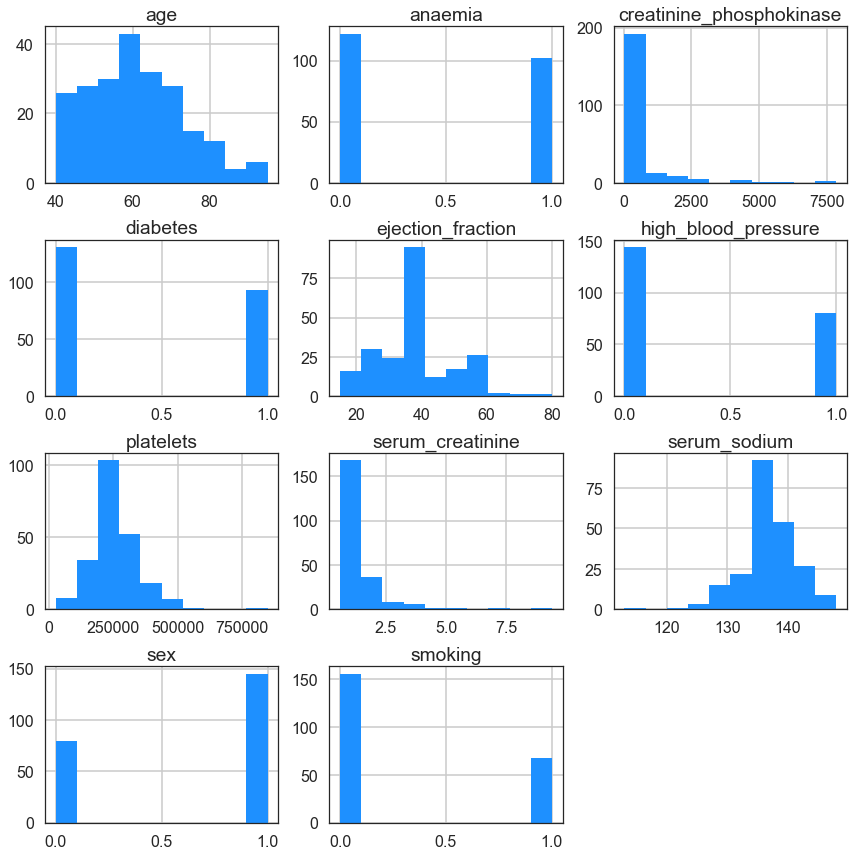

In [10]:
#Visual check for data balance, note mix of categorical and continuous variables
plt.style.use('seaborn-poster')
X_train.hist(figsize=(12,12), color='dodgerblue')
plt.tight_layout()
plt.savefig('balance.png')
plt.show()

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [11]:
# Scale your data
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Model Selection




In [12]:
#Select ten common classification algorithms from SKlearn
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [13]:
#Build lists of classification models and their names to loop through
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [14]:
#Loop through classification models to assess potential
training_score=[]
test_score=[]
for name, clf in zip(names, classifiers):
    model = clf
    model.fit(X_train_scaled,y_train)
    training_score.append(model.score(X_train_scaled, y_train))
    test_score.append(model.score(X_test_scaled, y_test))
    print(f"{name} Training Data Score: {model.score(X_train_scaled, y_train)}")
    print(f"{name} Testing Data Score: {model.score(X_test_scaled, y_test)}")

Nearest Neighbors Training Data Score: 0.78125
Nearest Neighbors Testing Data Score: 0.7066666666666667
Linear SVM Training Data Score: 0.7142857142857143
Linear SVM Testing Data Score: 0.7333333333333333
RBF SVM Training Data Score: 0.9955357142857143
RBF SVM Testing Data Score: 0.7333333333333333
Gaussian Process Training Data Score: 0.6607142857142857
Gaussian Process Testing Data Score: 0.7333333333333333
Decision Tree Training Data Score: 1.0
Decision Tree Testing Data Score: 0.76
Random Forest Training Data Score: 1.0
Random Forest Testing Data Score: 0.7733333333333333
Neural Net Training Data Score: 0.78125
Neural Net Testing Data Score: 0.76
AdaBoost Training Data Score: 0.8839285714285714
AdaBoost Testing Data Score: 0.7466666666666667
Naive Bayes Training Data Score: 0.6964285714285714
Naive Bayes Testing Data Score: 0.7466666666666667
QDA Training Data Score: 0.7053571428571429
QDA Testing Data Score: 0.7466666666666667


In [15]:
#Display model results sorted from best to worst based on default parameters
model_df = pd.DataFrame(list(zip(names,training_score,test_score)),\
                        columns =['Model', 'Train Score', 'Test Score'])
model_df = model_df.sort_values('Test Score',  ascending=False)
styled_df = model_df.style.background_gradient(cmap='Blues',low=.75, high=0).highlight_null('red')
dfi.export(styled_df,'model_selection.png')
styled_df

,Model,Train Score,Test Score
5,Random Forest,1.000000,0.773333
4,Decision Tree,1.000000,0.760000
6,Neural Net,0.781250,0.760000
7,AdaBoost,0.883929,0.746667
8,Naive Bayes,0.696429,0.746667
9,QDA,0.705357,0.746667
1,Linear SVM,0.714286,0.733333
2,RBF SVM,0.995536,0.733333
3,Gaussian Process,0.660714,0.733333
0,Nearest Neighbors,0.781250,0.706667


In [16]:
#Fit best model to training data
rf=RandomForestClassifier()
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

Confusion matrix, without normalization
[[49  6]
 [10 10]]
Normalized confusion matrix
[[0.89090909 0.10909091]
 [0.5        0.5       ]]


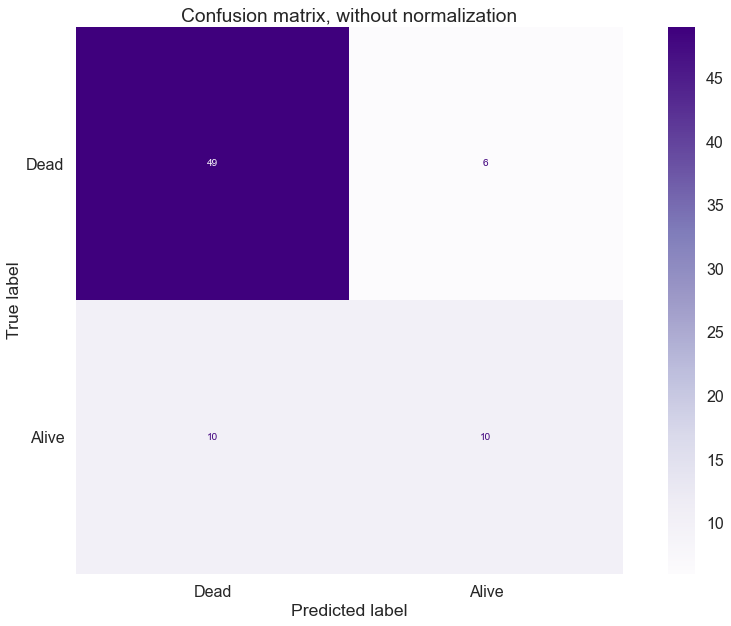

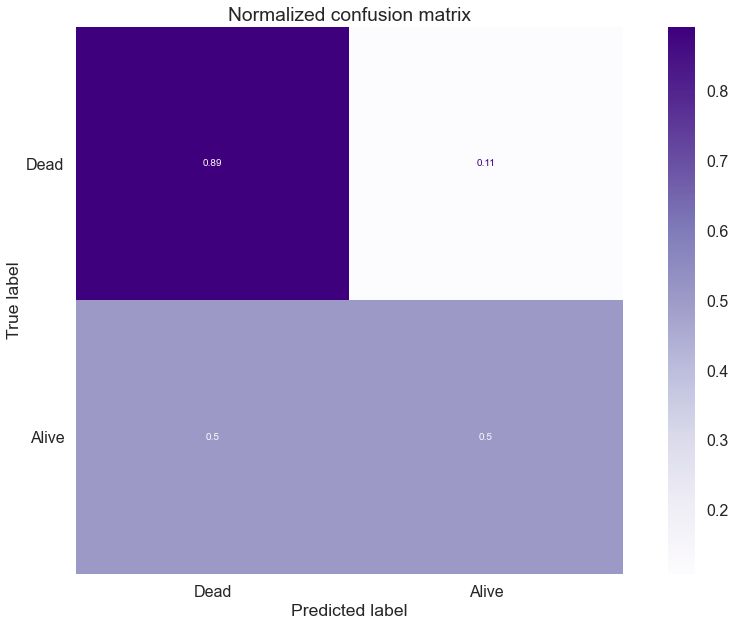

In [17]:
#Visualize default model accuracy; to be compared to optimized model accuracy 
from sklearn.metrics import plot_confusion_matrix

# Plot non-normalized confusion matrix
class_names = ['Dead','Alive']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    plt.style.use('seaborn-dark')
    disp = plot_confusion_matrix(rf, X_test_scaled, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Purples,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    plt.tight_layout()
    plt.savefig(f'{title}.png')    

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [18]:
#Save model with default params
import joblib
filename = 'random_forest_model_default.sav'
joblib.dump(rf, filename)

scalefile = 'scaler_default.sav'
joblib.dump(X_scaler,scalefile)

joblib.dump(X.columns,'default_input_col.sav')

['default_input_col.sav']

# Feature Selection

Use `RFECV` to select the most important features
> **RFECV**: Recursive Feature Eliminate Cross-Validation

In [19]:
from sklearn.feature_selection import RFECV

Optimal number of features : 6


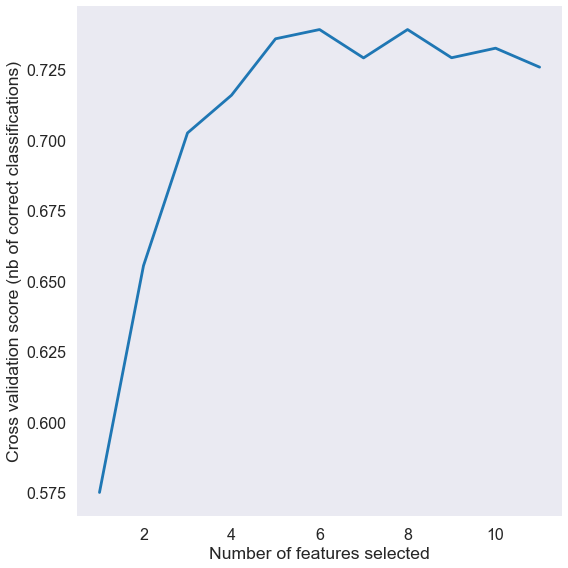

In [20]:
#Using best model from 'model selection', assess feature strength for model optimiztion
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=rf, step=1, cv=5,
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.style.use('seaborn-poster')
plt.figure(figsize=(8,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.tight_layout()
plt.savefig('rfe.png')
plt.show()

In [21]:
#Organize RFECV feature importance into dataframe for visualiztion
#Score is based on feature rank and is not an overall feature score
feature_df = pd.DataFrame(list(zip(df.columns,rfecv.support_,rfecv.ranking_,rfecv.grid_scores_)),\
                        columns =['Attribute', 'Important', 'Rank','Intra-Rank Score'])
feature_df = feature_df.sort_values('Rank',  ascending=True)
dfi.export(feature_df,'feature_selection.png')
feature_df

,Attribute,Important,Rank,Intra-Rank Score
0,age,True,1,0.575028
2,creatinine_phosphokinase,True,1,0.702486
4,ejection_fraction,True,1,0.735876
6,platelets,True,1,0.729096
7,serum_creatinine,True,1,0.739153
8,serum_sodium,True,1,0.729153
9,sex,False,2,0.732542
5,high_blood_pressure,False,3,0.739153
10,smoking,False,4,0.725819
3,diabetes,False,5,0.715876


In [22]:
#Evaluate feature selection using mean decrease in impurity (MDI)
import time
import numpy as np

start_time = time.time()
importances = rf.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.010 seconds


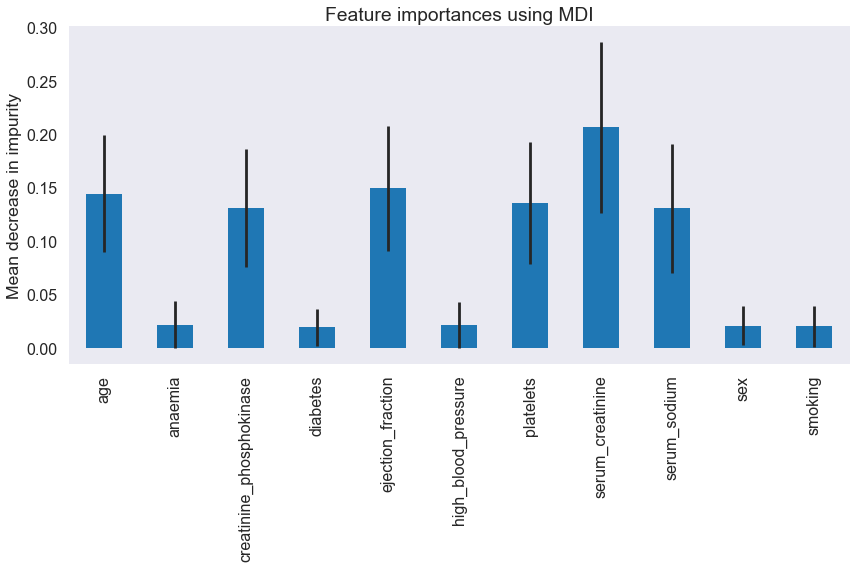

In [23]:
#Visualize MDI results to compare/contrast with RFECV
forest_importances = pd.Series(importances, index=X.columns)
plt.style.use('seaborn-poster')
fig, ax = plt.subplots(figsize=(12,8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig('mdi.png')
plt.show()

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [24]:
#Define Model Function to receive param grid
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier() 

In [25]:
# Create the GridSearchCV model
n_estimators = list(range(25,150,5))
max_features = ['auto', 'sqrt', 'log2']
criterion = ['gini', 'entropy']
param_grid = dict(n_estimators=n_estimators, max_features=max_features, criterion=criterion)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [26]:
# Create array for optimized features (dropped high blood pressure and smoking)
X_OPT = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex']]

In [27]:
# Create training and test sets with optimized features
X_train, X_test, y_train, y_test = train_test_split(X_OPT, y, random_state=1)

In [28]:
# Scale optimized data
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [29]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [25, 30, 35, 40, 45, 50, 55, 60, 65,
                                          70, 75, 80, 85, 90, 95, 100, 105, 110,
                                          115, 120, 125, 130, 135, 140, 145]})

In [30]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 45}
0.758888888888889


# Test Tuned Model

In [31]:
# Create instance of model with tuned features/parameters
# Best params from probabilistic search (100,auto,gini)
rf=RandomForestClassifier(
    n_estimators = 85,
    max_features = 'sqrt',
    criterion = 'gini'
)

rf.fit(X_train_scaled,y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=85)

In [32]:
print(f"Training Data Score: {rf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8133333333333334


Confusion matrix, without normalization
[[49  6]
 [ 8 12]]
Normalized confusion matrix
[[0.89090909 0.10909091]
 [0.4        0.6       ]]


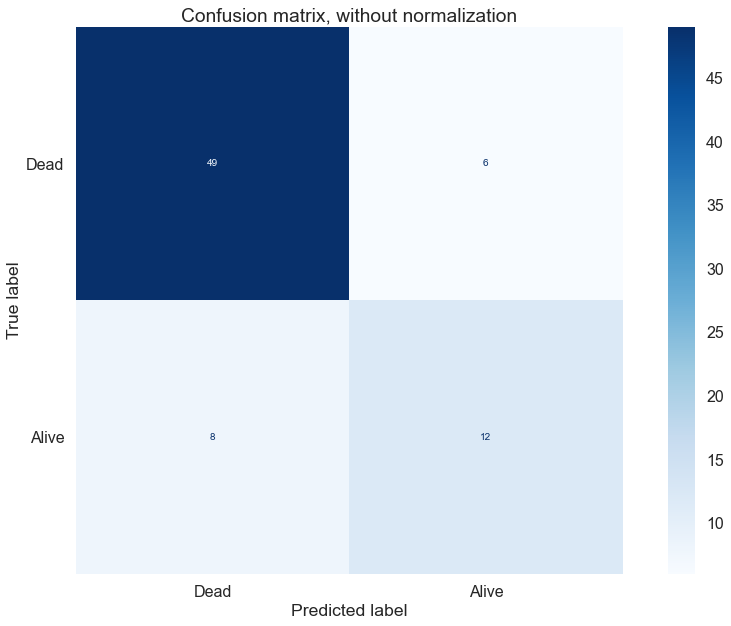

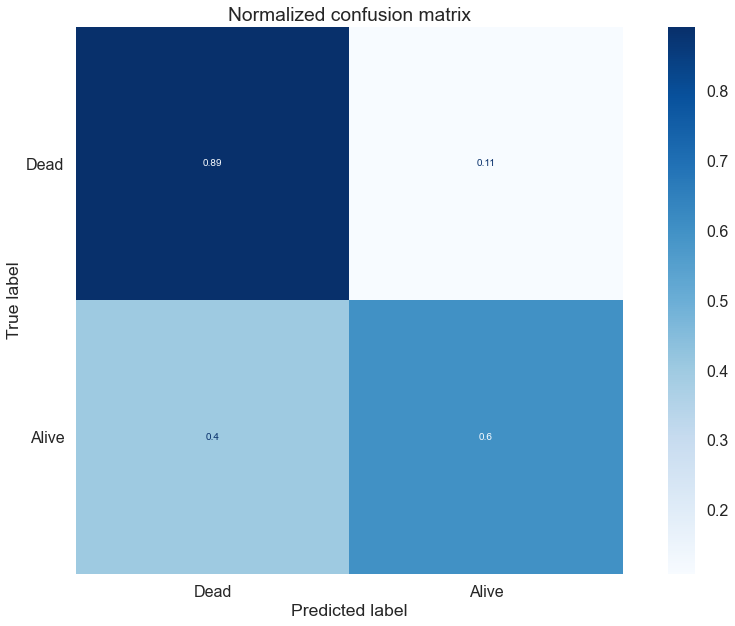

In [33]:
# Visualize feature and parameter tuned model accuracy with confusion matrix
class_names = ['Dead','Alive']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rf, X_test_scaled, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    plt.tight_layout()
    plt.savefig(f'Post_tune {title}.png')

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Save the Model

In [34]:
#Save tuned model 
filename = 'random_forest_model_tuned.sav'
joblib.dump(rf, filename)

scalefile = 'scaler_tuned.sav'
joblib.dump(X_scaler,scalefile)

joblib.dump(X_OPT.columns,'tuned_input_col.sav')

['tuned_input_col.sav']